In [4]:
# Spectral Audio Analysis with Librosa

import librosa
from librosa import display
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf 
import warnings
warnings.filterwarnings('ignore')
sample_rate = 96000
duration = 6  # seconds

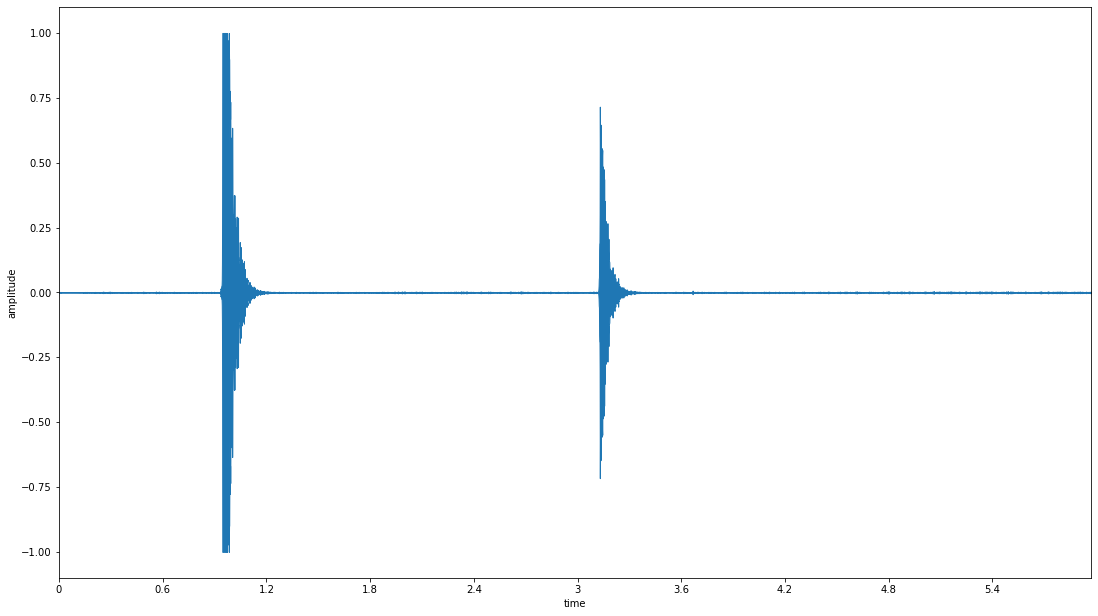

In [2]:
# load audio data
filename = '/Users/ipeksahbazoglu/Documents/MATLAB/EUROP/'+ 'audio2.wav'

amplitude, sample_rate = librosa.load(filename, sr = None)
len(amplitude), sample_rate

# visualise loaded data
plt.figure()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
librosa.display.waveplot(y = amplitude, sr = sample_rate);
plt.xlabel('time');
plt.ylabel('amplitude');
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

Recording Stopped


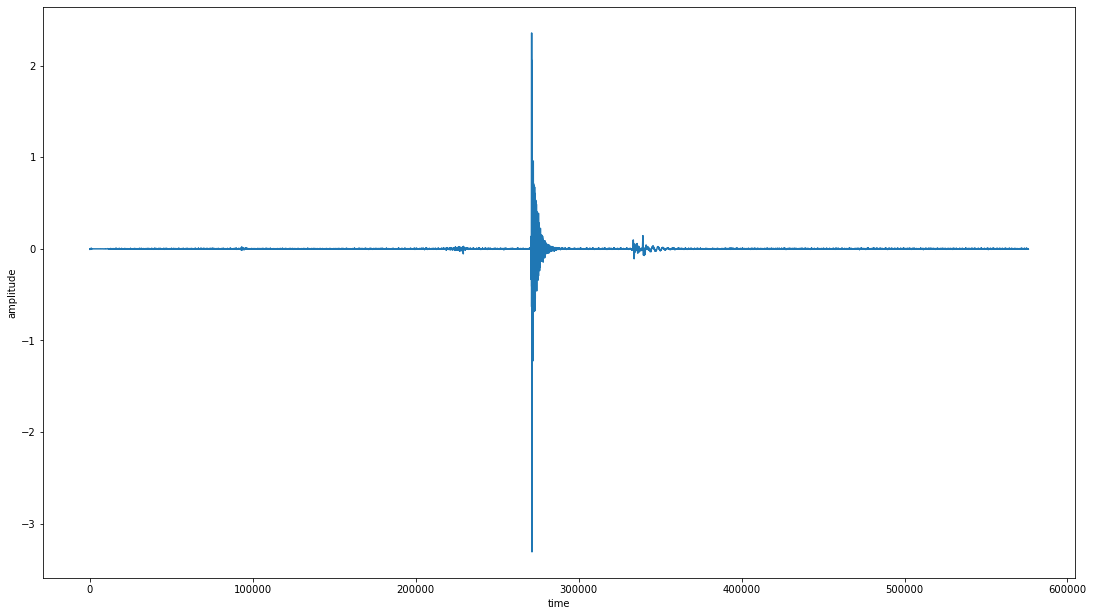

In [26]:
# or record audio
sample_rate = 96000
sd.default.samplerate = sample_rate
sd.default.channels = 1

duration = 6  # seconds
amplitude = sd.rec(int(duration * sample_rate))
sd.wait()
print('Recording Stopped')

# save the audio
filename = 'output.wav'
sf.write(filename, amplitude,sample_rate)

# visualise audio
plt.figure()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(amplitude)
plt.xlabel('time');
plt.ylabel('amplitude');
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

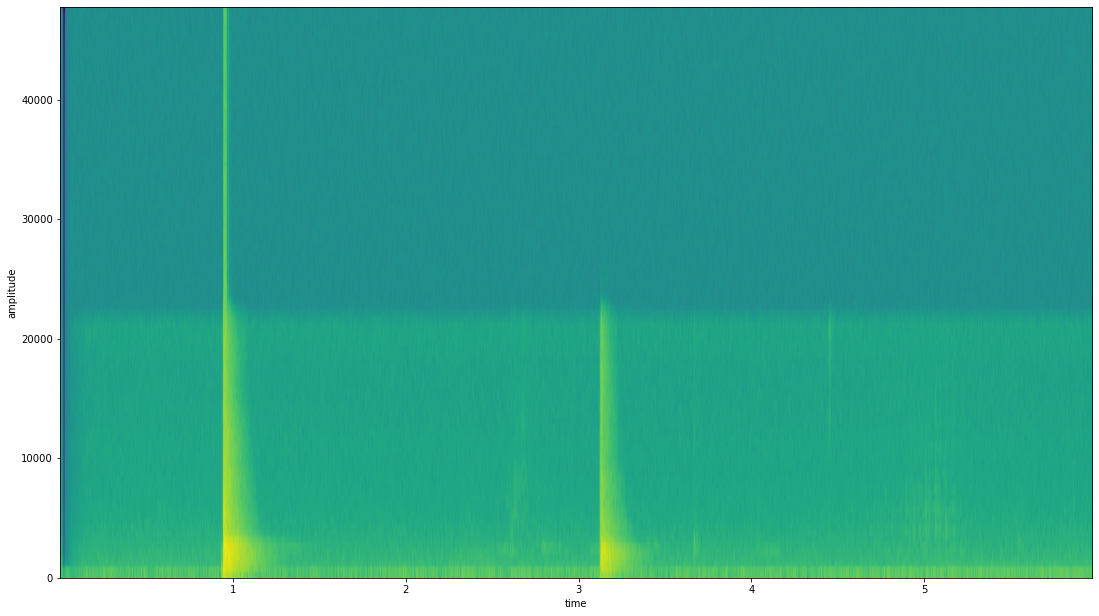

In [5]:
# Generate Spectrogram 

# Size of the FFT, will also be used as the window length
window_size_t = 0.002
n_fft= int((window_size_t/duration)*len(amplitude))
overlap = 0.50

# display spectogram
plt.figure()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.specgram(amplitude, Fs = sample_rate, NFFT = n_fft, 
             noverlap = int(n_fft*(1-overlap)),scale = 'dB' )
plt.xlabel('time');
plt.ylabel('amplitude');
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
